## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Prod Number: Number of products customer has with bank 
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)

# 1. Introduction 

## Background

Customer churn has been a cause for concern for the bank. The bank sees their clients end their relationship by switching to another bank and this has been worrying as losing clients can be very financially detrimental.

## Problem Statement
The goal is to understand why customer churn, and how it varies across different countries, ages, credit scores, etc through visualization, but also pick and create new predictors that will optimize our classification model.

**Inputs (features)** are:
1.	Unique ID of each Customer
2.	Credit Score of the Customer
3.	Country that Customer is from
4.	Gender of the Customer
5.	Age of the Customer
6.	How long the Customer has been with the bank
7.	The amount of money the Customer has with the bank
8.	Number of bank products the Customer has with the bank
9.	Whether the Customer have a credit card
10.	 Whether the Customer is actively engaged with the bank
11.	 Annual estimated salary of the customer

**Output (prediction target)** is:
12.	Whether customer has churned


# 2. Data Understanding / Pre-Processing

### Import the required libraries

In [59]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

%matplotlib inline

In [2]:
# To read the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

# To checck the 1st five rows of the dataset
dataset.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Analyze the data

In [3]:
# Get the number of rows and columns in the data set.
dataset.shape

(10000, 12)

This dataset has 10000 rows with 12 columns (features). We will review this further to identify what features will be necessary and what data manipulation needs to be carried out before EDA and prediction modelling.

Next, we will see how many missing data are there in the dataset.

In [4]:
# To check the number of missing data
dataset.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [5]:
# To see the rows with the missing data
dataset[dataset.isnull().any(axis=1)]

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
6,15592531,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
10,15767821,528,France,Male,NaN,6,102016.72,2,0,0,80181.12,0
11,15737173,497,Spain,Male,NaN,3,0.00,2,1,0,76390.01,0
12,15632264,476,France,Female,NaN,10,0.00,2,1,0,26260.98,0
37,15729599,804,Spain,Male,NaN,7,76548.60,1,0,1,98453.45,0
38,15717426,850,France,Male,NaN,7,0.00,1,1,1,40812.90,0
39,15585768,582,Germany,Male,NaN,6,70349.48,2,0,1,178074.04,0
74,15770811,519,France,Male,36.0,9,0.00,2,0,1,NaN,0
77,15662085,678,France,Female,32.0,9,0.00,1,1,1,NaN,0
87,15625759,729,France,Male,30.0,9,0.00,2,1,0,NaN,0


As there are very few missing information **(14 rows in total)**, we can safely drop these respective rows of data as they don't make much difference to the overall dataset.

In [6]:
# Dropping Rows with at least 1 null value in the dataset
dataset.dropna(axis=0, how='any', inplace=True)
dataset

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


Now we are left with 9986 rows. We will check whether there are any duplicated rows next.

In [7]:
# To check for any duplication
duplicateRows = dataset[dataset.duplicated()]
duplicateRows

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited


There are **no** duplicate entries. We will see whether there are any unique values for the features next.

In [8]:
# See unique count for each features
dataset.nunique()

CustomerId         9986
CredRate            460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6377
Prod Number           4
HasCrCard             2
ActMem                2
EstimatedSalary    9985
Exited                2
dtype: int64

**CustomerId** is irrelevant as it has no effect on customer leaving the bank, hence this column will be removed.

In [9]:
# Dropping 'CustomerId' column
dataset.drop('CustomerId', axis=1, inplace=True)

# To see the top rows of what is left of the dataset
dataset.head()

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


Next, we will look at the statistical summary and the data type of the dataset.

In [10]:
# Viewing statistical info of the dataset.
dataset.describe()

,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,650.564691,38.927799,5.010415,76539.635906,1.530142,0.705588,0.515121,100084.539598,0.203885
std,96.604678,10.491053,2.891614,62391.288935,0.581765,0.455801,0.499796,57511.969095,0.402905
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97262.675000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,717.750000,44.000000,7.000000,127653.825000,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
# To check varaiable data types
dataset.dtypes

CredRate             int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
Prod Number          int64
HasCrCard            int64
ActMem               int64
EstimatedSalary    float64
Exited               int64
dtype: object

From the look of it, we can presume that the dataset contains several numerical and categorical columns providing various information on the customer churn.

### Data Visualization

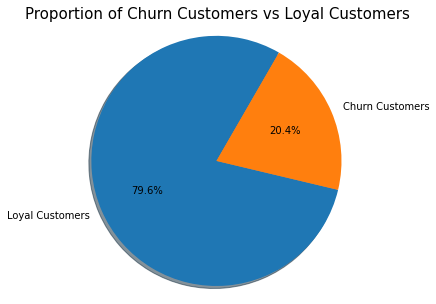

In [12]:
# To determine the proportion of total number of customers who churn vs those who doesn't
ExitedValues = dataset.Exited.value_counts()
labels = ["Loyal Customers","Churn Customers"]
fig1, f1 = plt.subplots(figsize=(5, 5))
f1.pie(ExitedValues,labels=labels, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.title("Proportion of Churn Customers vs Loyal Customers", size = 15)
plt.show()

Based on the piechart above, the focus will be on the 20% of the customers for the baseline model for prediction as it will be of interest to the bank to identify and keep this bunch, as opposed to predict the 80% who are loyal customers.

#### Credit Score

Text(0.5, 1.0, 'Customers according to Credit Score')

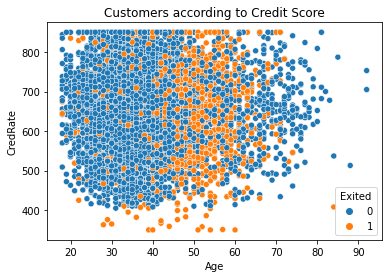

In [13]:
# To visualize at which level of Credit Score that customers tend to churn 
sns.scatterplot(x = "Age", y = "CredRate", hue = "Exited", sizes = (10, 200), data = dataset)
plt.title("Customers according to Credit Score")

Customer with CreditScore less then 400 tend to churn.

#### Geography

Text(0.5, 1.0, 'Countries: Exited vs Non-Exited')

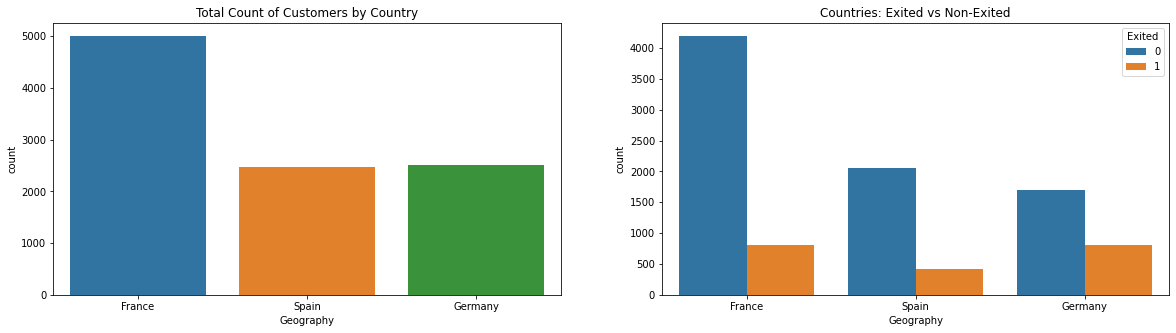

In [14]:
# To visualize which country that customers tend to churn 
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'Geography', data=dataset, ax=axarr[0])
axarr[0].set_title("Total Count of Customers by Country")
sns.countplot(x='Geography', hue = 'Exited', data = dataset,ax=axarr[1])
axarr[1].set_title("Countries: Exited vs Non-Exited")

Most of the customers(approx 50%) live in France while Germany and Spain have almost the same number of customers. However, it seems like the customers from Germany are more likely to churn comparing to the ones from France or Spain.

#### Gender

Text(0.5, 1.0, 'Gender: Exited vs Non-Exited')

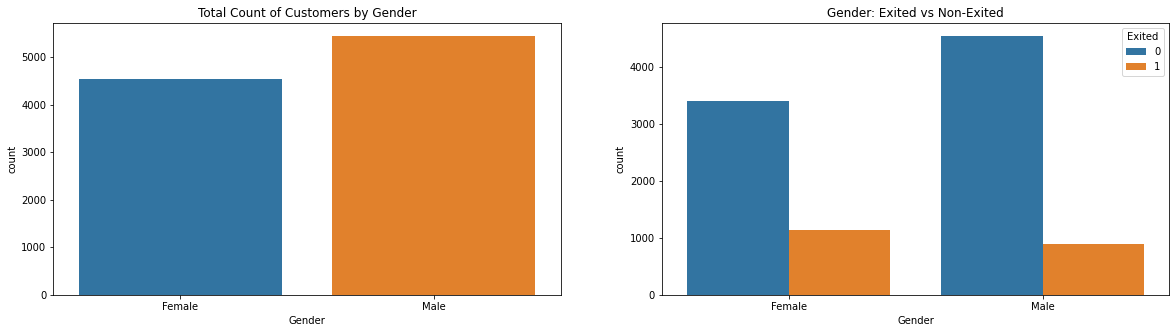

In [15]:
# To visualize which gender tend to churn 
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'Gender', data=dataset, ax=axarr[0])
axarr[0].set_title("Total Count of Customers by Gender")
sns.countplot(x='Gender', hue = 'Exited', data = dataset,ax=axarr[1])
axarr[1].set_title("Gender: Exited vs Non-Exited")

There is not much significant difference in the churn proportion between male and female customers. 

#### Age

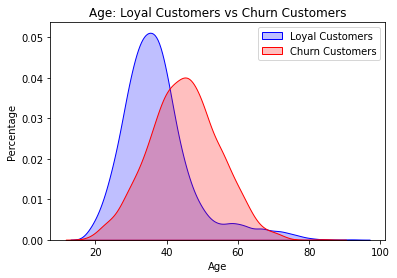

In [16]:
# To visualize which age group tend to churn 
plot = sns.kdeplot(dataset["Age"][(dataset["Exited"] == 0) & (dataset["Age"].notnull())], color="Blue", shade = True)
plot = sns.kdeplot(dataset["Age"][(dataset["Exited"] == 1) & (dataset["Age"].notnull())], ax =plot, color="Red", shade= True)
plot.set_title("Age: Loyal Customers vs Churn Customers")
plot.set_xlabel("Age")
plot.set_ylabel("Percentage")
plot = plot.legend(["Loyal Customers","Churn Customers"])

The "Loyal Customers" tend to be right-skewed, whereas the "Churn Customers" are normal distributed. This means that the younger customers (less than 45) have lower chance to churn compared to the older customers.

#### Tenure

Text(0.5, 1.0, 'Tenure: Exited vs Non-Exited')

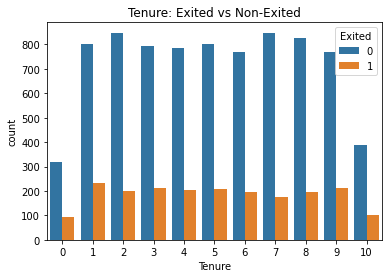

In [17]:
# To visualize how many years the customers are with the bank tend to churn 
sns.countplot(x='Tenure', hue = 'Exited', data = dataset).set_title("Tenure: Exited vs Non-Exited")

Tenure is quite evenly distributed, and there is not much difference between the two target categories. There is no obvious duration where customers tend to churn. 

#### Balance

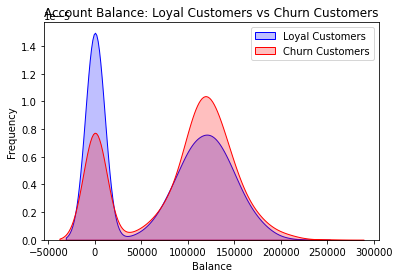

In [18]:
# To visualize how much bank balance the customers have tend to churn 
plot = sns.kdeplot(dataset["Balance"][(dataset["Exited"] == 0) & (dataset["Balance"].notnull())], color="Blue", shade = True)
plot = sns.kdeplot(dataset["Balance"][(dataset["Exited"] == 1) & (dataset["Balance"].notnull())], ax =plot, color="Red", shade= True)
plot.set_title("Account Balance: Loyal Customers vs Churn Customers")
plot.set_xlabel("Balance")
plot.set_ylabel("Frequency")
plot = plot.legend(["Loyal Customers","Churn Customers"])

The above graph shows that the bank customers tend not to churn when they have not much bank balance. This also shows that the bank is losing customers with higher bank balance.

#### Number of Products

Text(0.5, 1.0, 'Number of Products: Exited vs Non-Exited')

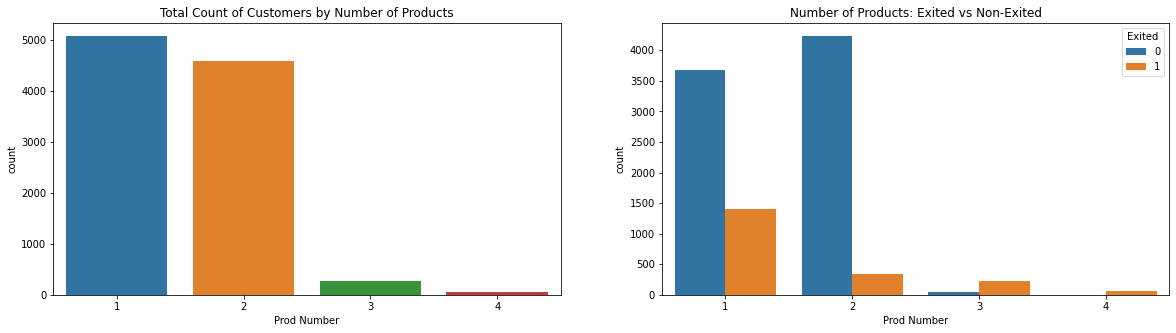

In [19]:
# To visualize at how many products the customers have tend to churn 
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'Prod Number', data=dataset, ax=axarr[0])
axarr[0].set_title("Total Count of Customers by Number of Products")
sns.countplot(x='Prod Number', hue = 'Exited', data = dataset,ax=axarr[1])
axarr[1].set_title("Number of Products: Exited vs Non-Exited")

Customers with more than 3 products with the bank have a bigger chance to churn.

#### Has Credit Card

Text(0.5, 1.0, 'Has Credit Card: Exited vs Non-Exited')

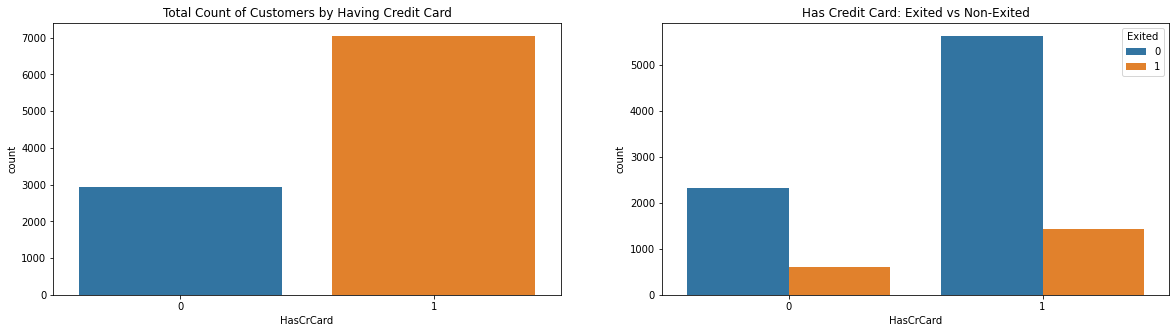

In [20]:
# To visualize whether customer with credit card tend to churn
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'HasCrCard', data=dataset, ax=axarr[0])
axarr[0].set_title("Total Count of Customers by Having Credit Card")
sns.countplot(x='HasCrCard', hue = 'Exited', data = dataset,ax=axarr[1])
axarr[1].set_title("Has Credit Card: Exited vs Non-Exited")

Majority of the customers that have churned owns credit card. Given that majority of the customers own one, this might be a coincidence.

#### Is an Active Member

Text(0.5, 1.0, 'Active Member: Exited vs Non-Exited')

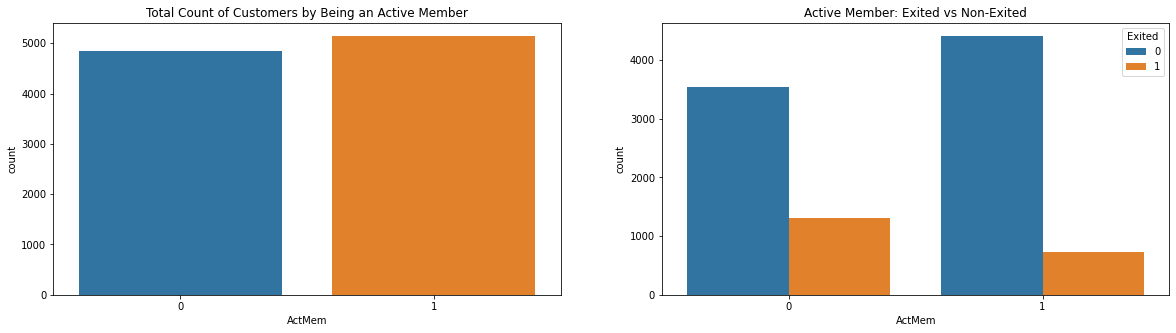

In [21]:
# To visualize whether active member tend to churn
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x = 'ActMem', data=dataset, ax=axarr[0])
axarr[0].set_title("Total Count of Customers by Being an Active Member")
sns.countplot(x='ActMem', hue = 'Exited', data = dataset,ax=axarr[1])
axarr[1].set_title("Active Member: Exited vs Non-Exited")

Unsurpsingly, the inactive member tend to have a greater churn. Point to note that the overall proportion of inactive members is quite high, where the bank needs to engage and implement some programs to turn this group into active customers.

#### Estimated Salary

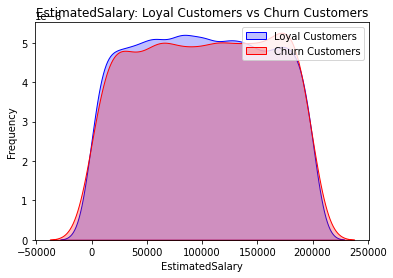

In [22]:
# To visualize at what level of estimated salary customers tend to churn
plot = sns.kdeplot(dataset["EstimatedSalary"][(dataset["Exited"] == 0) & (dataset["Balance"].notnull())], color="Blue", shade = True)
plot = sns.kdeplot(dataset["EstimatedSalary"][(dataset["Exited"] == 1) & (dataset["Balance"].notnull())], ax =plot, color="Red", shade= True)
plot.set_title("EstimatedSalary: Loyal Customers vs Churn Customers")
plot.set_xlabel("EstimatedSalary")
plot.set_ylabel("Frequency")
plot = plot.legend(["Loyal Customers","Churn Customers"])

Estimated Salary does not have impact on whether customer churn as the distribution is fairly even.

### Correlations

Text(0.5, 1.0, 'Features Correlation Matrics')

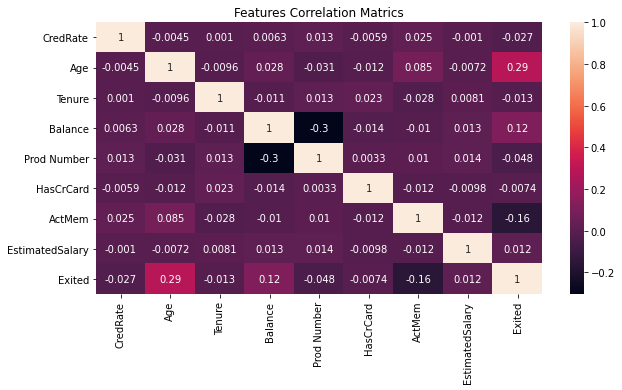

In [23]:
# Checking correlation between variables
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(dataset.corr(),annot=True).set_title("Features Correlation Matrics")

Our target variable is **Exited** and from the correlation matrix we see that there are no strong correlations with any of the features corresponding to the target variable. **Age** is slightly correlated.

### Data Pre-Processsing

In [24]:
# Converting the Geography column into three distinct columns (France, Spain and Germany) and drop this column.
dataset=pd.concat([dataset, pd.get_dummies(dataset.Geography)], axis=1)
dataset.drop('Geography', axis=1, inplace=True)

In [25]:
# Converting the Gender column by assigning 1 = Male, 0 = Female. 
dataset['Gender'] = dataset['Gender'].apply(lambda x : 1 if x=='Male' else 0)

These 2 columns are converted from categorical features into numerical values. This is because Machine Learning algorithms works best with numerical values as inputs. 

In [26]:
# Checking the new dataset
dataset.head()

,CredRate,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42.0,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43.0,2,125510.82,1,1,1,79084.10,0,0,0,1


# 3. Machine Learning Model Training:

Since the target variable **Exited** is binary in nature as it denotes whether the customer has churned or not(0= No, 1= Yes), we will apply the following classification machine learning algorithms for modelling purposes:

1. K-Nearest Neighbor (KNN)
2. Logistic Regression (LR)
3. AdaBoost
4. Gradient Boosting (GB)
5. RandomForest (RF)

In [27]:
# Isolating the variable that we're predicting from the dataset.
X = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

The reason behind dropping this attribute is that this attribute contains the target for each row. Machine algorithms need input in terms of a key-value pair, so a target column is key and all other columns are values. We can say that a certain pattern of values will lead to a particular target value, which we need to predict using a machine learning algorithm.

In [28]:
# Dividing the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

The training set contains the data that will be used to train our machine learning model. The test set will be used to evaluate how good our model is. We'll use 20% of the data for the test set and the remaining 80% for the training set.

#### 1. K-Nearest Neighbor

KNN is a supervised classification that assumes that similar data exist in close proximity (based on distance):
- Euclidean : measures the straight-line distance between two samples
- Manhattan : measures the point-to-point travel time

In [29]:
# Initialization of the KNN
knMod = KNeighborsClassifier(n_neighbors = 5, p = 2)  # p=2 uses euclidean distance
# Fitting the model with training data 
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
knn_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

#### 2. Logistic Regression

Logistic regression is used to explain data and the relationship between one or more independent variables (features) and one dependent It suits well where our target variable is binary and categorical. 

We are trying to predict whether the customers are like to leave or stay, the outcome is binary.

In [31]:
# Initialization of the LR
lrMod = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = True,
                            intercept_scaling = 1, class_weight = None, 
                            random_state = None, solver = 'liblinear', max_iter = 100,
                            multi_class = 'ovr', verbose = 2)
# Fitting the model with training data 
lrMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [32]:
# Compute the model accuracy on the given test data and labels
lr_acc = lrMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = lrMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
lr_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)

#### 3. AdaBoost 

AdaBoost is an ensemble learning method (also known as “meta-learning”) which was initially created to increase the efficiency of binary classifiers. AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

In [33]:
# Initialization of the AdaBoost model
adaMod = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
# Fitting the model with training data 
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [34]:
# Compute the model accuracy on the given test data and labels
ada_acc = adaMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = adaMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
ada_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

#### 4. Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Here Gradient boosting classifying the outcome to whether a client will churn or not, it is a predictive model in the form of an ensemble uses decision trees.

In [35]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Fitting the model with training data 
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
gb_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

#### 5. Random Forest

RF works based on a collection of decision trees, each unrelated and then collating the output of each tree for its final output.

In [37]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data 
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
rf_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')

### Test Summary of the Baseline Models

In [39]:
models = ['KNN', 'Logistic Regression', 'AdaBoost', 'GradientBoosting', 'Random Forest']
accuracy = [knn_acc, lr_acc, ada_acc, gb_acc, rf_acc]
roc_auc = [knn_roc_auc, lr_roc_auc, ada_roc_auc, gb_roc_auc, rf_roc_auc]

d = {'accuracy': accuracy, 'roc_auc': roc_auc}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,accuracy,roc_auc
KNN,0.757758,0.538826
Logistic Regression,0.793794,0.675210
AdaBoost,0.860360,0.834244
GradientBoosting,0.871872,0.857484
Random Forest,0.857357,0.817029


In [40]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
fpr_lr, tpr_lr, _ = roc_curve(y_test, lrMod.predict_proba(np.array(X_test.values))[:,1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, adaMod.predict_proba(np.array(X_test.values))[:,1])
fpr_gb, tpr_gb, _ = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])

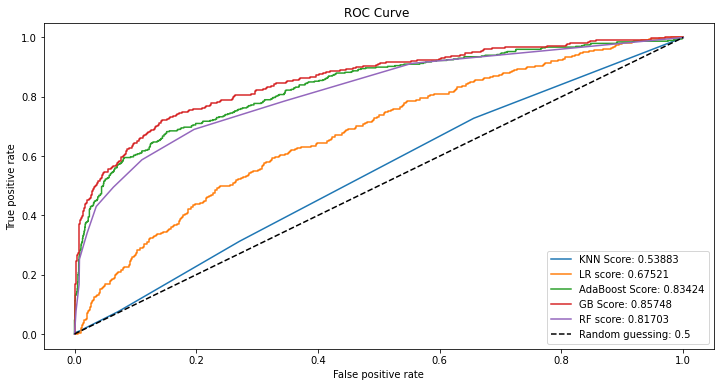

In [41]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(knn_roc_auc, 5)))
plt.plot(fpr_lr, tpr_lr, label = 'LR score: ' + str(round(lr_roc_auc, 5)))
plt.plot(fpr_ada, tpr_ada, label = 'AdaBoost Score: ' + str(round(ada_roc_auc, 5)))
plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(gb_roc_auc, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(rf_roc_auc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

ROC-AUC score is more significant for us because the accuracy score takes in only one thresold value, whereas the former takes into consideration all possible thereshold values and gives us the score.

AB and GB rank the highest among the 5 baseline models. We will now focus on the AdaBoost and GB classifiers to improve the accuracy score.

### Implementing a cross-validation based approach

Here, we are going to implement K-folds cross-validation. For the value of K, we are going to use  K=5 .

In [42]:
# Import the cross-validation module
from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [43]:
mod = [knMod, lrMod, adaMod, gbMod, rfMod]
cvD = cvDictGen(mod, scr = 'roc_auc')
cvD

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'KNeighborsClassifier': [0.5330547582947694, 0.014824674830130675],
 'LogisticRegression': [0.677940041746923, 0.009576607171885305],
 'AdaBoostClassifier': [0.8429403864059802, 0.005966742573489092],
 'GradientBoostingClassifier': [0.8650549568335361, 0.0028831517966495697],
 'RandomForestClassifier': [0.8173355002919376, 0.007856713078215944]}

As we can see, in the above output, **GradietBoosting** and **Adaboot classifier** perform well.  So, we are going to use the RandomizedSearchCV hyperparameter tuning method. We will implement this method for the AdaBoost and GradientBoosting models since they are the one having good performance.

### Implement Hyperparameter Tuning

#### AdaBoost

In [44]:
# Possible parameters
adaHyperParams = {'n_estimators': [10,50,100,200,400]}

In [45]:
gridSearchAda = RandomizedSearchCV(estimator = adaMod, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc')
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=200,
                                                random_state=None),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'n_estimators': [10, 50, 100, 200,
                                                         400]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [46]:
# Display the best parameters and the score
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50}, 0.8496533066652694)

#### GradientBoosting

In [47]:
# Possibles parameters
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [48]:
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = gbMod, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [49]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'deviance', 'max_depth': 4, 'n_estimators': 79}, 0.8660232968737365)

### Train models with help of new hyper parameter

Here we are going to use the optimal parameter values that we got from the hyperparameter tuning

In [50]:
# GradientBoosting with the optimal parameters
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [51]:
# AdaBoost with the optimal parameter
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [52]:
functions = [bestGbModFitted, bestAdaModFitted]
cvDictbestpara = cvDictGen(functions, scr = 'roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.8655494456215876, 0.004895972465215402],
 'AdaBoostClassifier': [0.8476015020923455, 0.004971792077192442]}

In [53]:
# Getting the score GradientBoosting
test_labels = bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.855197903629537

In [54]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8407000938673341

We do not see any much improvement in the 2 models. 

# 4. Evaluation / Results

We will use confusion matrix to measure our performance for our best performing model with close to accuracy score of 87%, which is **GradientBoosting**. It is extremely useful for measuring Recall, Precision, Specificity, Accuracy.

              precision    recall  f1-score   support

       Loyal       0.88      0.97      0.92      1598
       Churn       0.79      0.48      0.60       400

    accuracy                           0.87      1998
   macro avg       0.84      0.72      0.76      1998
weighted avg       0.86      0.87      0.86      1998



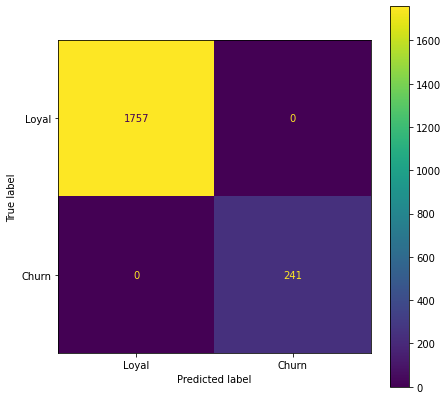

In [64]:
y_pred = bestGbModFitted.predict(X_test)
classes = ['Loyal', 'Churn']
print(classification_report(y_test, y_pred, target_names=classes))
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(bestGbModFitted, X_test, y_pred, display_labels=classes, ax=ax, values_format = '')

From the report, we can see that the recall of the model is about 97% meaning the model correctly identified about 97% of the customers that were retained and miss about 3%.

The precision of the model was about 88% and the f1-score was about 92%. The accuracy of the model was about 87%.

Based on the confusion matrix, this is an ideal situtation where both false positive values and false negative values are 0. But this wouldn't be the case in real-life.

# 5. Conclusion

During EDA, we noted the following:

- Customers with credit score less than 400 tend to churn
- Customers from Germany are more likely to churn comparing to the ones from France or Spain.
- Younger customers (less than age 45) have lower chance to churn compared to the older customers
- Customers tend not to churn when they have not much bank balance
- Customers with more than 3 products with the bank have a bigger chance to churn
- Inactive member tend to have a greater churn


After building several models, we ended up with GradientBoosting and AdaBoost which performed better than others followed by Random Forest. We decided to choose GradientBoosting in the end as it provides us the one with the higher accuracy score.

If we have more time, we could have spent more time on the transformation of features engineering. We could have implement a voting mechanism in order to generate the final probability of the prediction on the actual test dataset so that we can get the best accuracy score.